# PS3: Deep learning

In this problem set, you will experiment with fully-connected neural networks.

To start with, let's load the "breast cancer" data set from scikit-learn:

In [21]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
y = np.matrix(data.target).T
X = np.matrix(data.data)
M = X.shape[0]
N = X.shape[1]

# Normalize each input feature

def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return XX

XX = normalize(X)

Next, let's represent a fully-connected neural network by two arrays W and b containing the weights and biases for each layer.

In [22]:
h = 5
W = [[], np.random.normal(0,0.1,[N,h]), np.random.normal(0,0.1,[h,1])]
b = [[], np.random.normal(0,0.1,[h,1]), np.random.normal(0,0.1,[1,1])]
L = len(W)-1

def act(z):
    return 1/(1+np.exp(-z))

def actder(z):
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod

def ff(x,W,b):
    L = len(W)-1
    a = x
    for l in range(1,L+1):
        z = W[l].T*a+b[l]
        a = act(z)
    return a

def loss(y,yhat):
    return -((1-y) * np.log(1-yhat) + y * np.log(yhat))

## Question 1

Write Python code to separate $\texttt{X},\texttt{y}$ randomly into a training set containing 80% of the data and a validation set consisting of the remaining 20% of the data.

In [23]:
"""
Splitting data into Training and Validation Sets
"""
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(XX, y, test_size = .20)

## Question 2

Beginning with the training code we wrote together in class, write Python code to execute backpropagation with mini-batch size 1 on the training set, and plot the training loss and validation loss as a function of training iteration. Show the plot in this sheet.

2-Layer Neural Network
Hidden Units: 10
Training Loss 18.371744 
Validation Loss 15.230803 


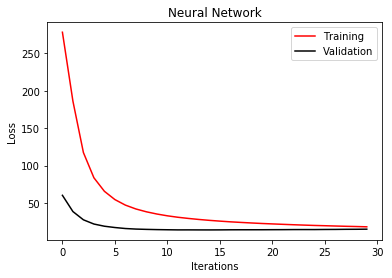

In [24]:
# Code goes here
import matplotlib.pyplot as plt

print("2-Layer Neural Network")

h = 10
print("Hidden Units: %d" %h)

W = [[], np.random.normal(0, 0.1, [N, h]), np.random.normal(0, 0.1, [h, 1])]
b = [[], np.random.normal(0, 0.1, [h, 1]), np.random.normal(0, 0.1, [1, 1])]
L = len(W) - 1

"""
Sigmoid Activation Function
"""

def act(z):
    return 1 / (1 + np.exp(-z))

def actder(z):
    az = act(z)
    prod = np.multiply(az, 1 - az)
    return prod

"""
ReLU Activation Function
"""

def ReLU(z):
    z[z < 0] = 0
    return z

def ReLU_der(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z


"""
Feed-Forward
"""

def ff(x, W, b):
    L = len(W) - 1
    a = x
    for l in range(1, L + 1):
        z = W[l].T * a + b[l]
        a = act(z)
    return a

"""
Loss Fuction
"""

def loss(y, yhat):
    return -((1 - y) * np.log(1 - yhat) + y * np.log(yhat))



M = Xtrain.shape[0]
N = Xtrain.shape[1]
S = Xtest.shape[0]
R = Xtest.shape[1]


alpha = 0.01
iterations = 30
mini_batch = 1

training_loss = []
validation_loss = []

for iter in range(0, iterations):
    train_loss = 0
    validate_loss = 0
    order = np.random.permutation(M) 
    for i in range(0, M):
    
        x_this = Xtrain[order[i], :].T
        y_this = Ytrain[order[i], 0]
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1, L + 1):
            z.append(W[l].T * a[l - 1] + b[l])
            a.append(act(z[l]))
            
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        train_loss_pattern = loss(y_this, a[L][0, 0])
        train_loss = train_loss + train_loss_pattern
            
        # Backprop step... (to fill in!)

        delta[L] = a[L] - y_this
        for l in range(L, 0, -1):
            db[l] = delta[l].copy()
            dW[l] = a[l - 1] * delta[l].T
            if l > 1:
                #delta[l-1] = np.multiply(W[l], actder(z[l-1])) * delta[l]
                delta[l - 1] = np.multiply(actder(z[l - 1]), W[l] * delta[l])
                
        
        
        # MOMENTUM
        for l in range(1, L + 1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    
    
    for i in range(0, S):
        x_this = Xtest[i, :].T
        y_this = Ytest[i, 0]
        a = [x_this]
        z = [[]]
        
        for l in range(1, L + 1):
            z.append(W[l].T * a[l - 1] + b[l])
            a.append(act(z[l]))
            
            
        validate_pattern = loss(y_this, a[L][0, 0])
        validate_loss = validate_loss + validate_pattern
        
    
        
    training_loss.append(train_loss)
    validation_loss.append(validate_loss)
#     print('Iteration %d Training loss %f' % (iter, train_loss))
#     print("Iteration %d Validation loss %f" %(iter, validate_loss))
    

print("Training Loss %f " % training_loss[-1])
print("Validation Loss %f " % validation_loss[-1])


#Plot training loss and validation loss

plt.plot(range(iterations), training_loss, color = "Red", label = "Training")
plt.plot(range(iterations), validation_loss, color = "Black", label = "Validation")

plt.legend()

plt.title("Neural Network")    
plt.xlabel("Iterations")
plt.ylabel("Loss")
    
plt.show()

## Question 3

Perform several experiments with different numbers of layers and different numbers of hidden units. Demonstrate the phenomenon of overtraining, make a table showing the training and validation set performance of each of your models, and make a recommendation about which model is best based on validation set performance.

3-Layer Neural Network
Training Loss 27.305735 
Validation Loss 8.105105 


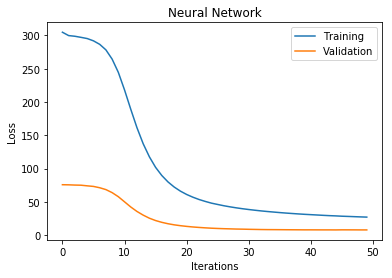

In [5]:
### Good Model ###

import matplotlib.pyplot as plt

print("3-Layer Neural Network")

h1 = 10
h2 = 6

W = [[], np.random.normal(0, 0.1, [N, h1]),
         np.random.normal(0, 0.1, [h1, h2]),
         np.random.normal(0, 0.1, [h2, 1])]

b = [[], np.random.normal(0, 0.1, [h1, 1]), 
         np.random.normal(0, 0.1, [h2, 1]),
         np.random.normal(0, 0.1, [1, 1])]

L = len(W)-1

"""
Sigmoid Activation Function
"""

def act(z):
    return 1/(1+np.exp(-z))

def actder(z):
    az = act(z)
    prod = np.multiply(az, 1 - az)
    return prod
"""
ReLU Activation Function
"""

def ReLU(z):
    z[z < 0] = 0
    return z

def ReLU_der(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z

"""
Feed-Forward 
"""

def ff(x, W, b):
    L = len(W)-1
    a = x
    for l in range(1, L+1):
        z = W[l].T * a + b[l]
        a = act(z)
    return a

"""
Loss Function
"""

def loss(y,yhat):
    return -((1 - y) * np.log(1 - yhat) + y * np.log(yhat))



M = Xtrain.shape[0]
N = Xtrain.shape[1]
S = Xtest.shape[0]
R = Xtest.shape[1]


alpha = 0.01
iterations = 50
mini_batch = 1

training_loss = []
validation_loss = []

for iter in range(0, iterations):
    train_loss = 0
    validate_loss = 0
    order = np.random.permutation(M) 
    for i in range(0, M):
    
        x_this = Xtrain[order[i],:].T
        y_this = Ytrain[order[i],0]
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1, L+1):
            z.append(W[l].T*a[l-1]+b[l])
            a.append(act(z[l]))
            
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        train_loss_pattern = loss(y_this, a[L][0,0])
        train_loss = train_loss + train_loss_pattern
            
        # Backprop step... (to fill in!)

        delta[L] = a[L] - y_this
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                #delta[l-1] = np.multiply(W[l], actder(z[l-1])) * delta[l]
                delta[l-1] = np.multiply(actder(z[l-1]), W[l] * delta[l])
                
        
        
        # MOMENTUM
        for l in range(1, L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    
    
    for i in range(0, S):
        x_this = Xtest[i,:].T
        y_this = Ytest[i, 0]
        a = [x_this]
        z = [[]]
        
        for l in range(1, L+1):
            z.append(W[l].T*a[l-1] + b[l])
            a.append(act(z[l]))
            
            
        validate_pattern = loss(y_this, a[L][0, 0])
        validate_loss = validate_loss + validate_pattern
        
    
        
    training_loss.append(train_loss)
    validation_loss.append(validate_loss)
    #print('Iteration %d Training loss %f' % (iter, train_loss))
    #print("Iteration %d Validation loss %f" %(iter, validate_loss))
    

print("Training Loss %f " % training_loss[-1])
print("Validation Loss %f " % validation_loss[-1])

#Plot training loss and validation loss

plt.plot(range(iterations), training_loss, label = "Training")
plt.plot(range(iterations), validation_loss, label = "Validation")

plt.legend()
    
plt.title("Neural Network")    
plt.xlabel("Iterations")
plt.ylabel("Loss")
    
plt.show()

Training Loss 15.447006 
Validation Loss 12.239535 


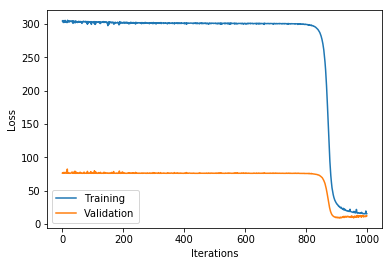

In [6]:
### Overtrained Model ###

import matplotlib.pyplot as plt

h1 = 1
h2 = 7
h3 = 21
h4 = 45

W = [[], np.random.normal(0, 0.1, [N, h1]), 
         np.random.normal(0, 0.1, [h1, h2]),
         np.random.normal(0, 0.1, [h2, h3]),
         np.random.normal(0, 0.1, [h3, h4]),
         np.random.normal(0, 0.1, [h4, 1])]

b = [[], np.random.normal(0, 0.1, [h1, 1]), 
         np.random.normal(0, 0.1, [h2, 1]),
         np.random.normal(0, 0.1, [h3, 1]),
         np.random.normal(0, 0.1, [h4, 1]),
         np.random.normal(0, 0.1, [1, 1])]

L = len(W)-1

"""
Sigmoid Activation Function
"""

def act(z):
    return 1/(1+np.exp(-z))

def actder(z):
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod

"""
ReLU Activation Function
"""

def ReLU(z):
    z[z < 0] = 0
#     print(z)
    return z


def ReLU_der(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z

"""
Feed-Forward
"""

def ff(x, W, b):
    L = len(W)-1
    a = x
    for l in range(1, L+1):
        z = W[l].T * a + b[l]
        a = act(z)
    return a


"""
Loss Function
"""

def loss(y,yhat):
    return -((1 - y) * np.log(1 - yhat) + y * np.log(yhat))



M = Xtrain.shape[0]
N = Xtrain.shape[1]
S = Xtest.shape[0]
R = Xtest.shape[1]


alpha = 0.01
iterations = 999
mini_batch = 1

training_loss = []
validation_loss = []

for iter in range(0, iterations):
    train_loss = 0
    validate_loss = 0
    order = np.random.permutation(M) 
    for i in range(0, M):
    
        x_this = Xtrain[order[i],:].T
        y_this = Ytrain[order[i],0]
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1, L+1):
            z.append(W[l].T*a[l-1]+b[l])
            a.append(act(z[l]))
            
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        train_loss_pattern = loss(y_this, a[L][0,0])
        train_loss = train_loss + train_loss_pattern
            
        # Backprop step... (to fill in!)

        delta[L] = a[L] - y_this
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                #delta[l-1] = np.multiply(W[l], actder(z[l-1])) * delta[l]
                delta[l-1] = np.multiply(actder(z[l-1]), W[l] * delta[l])
                
        
        
        # Momentum
        for l in range(1, L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    
    
    for i in range(0, S):
        x_this = Xtest[i,:].T
        y_this = Ytest[i, 0]
        a = [x_this]
        z = [[]]
        
        for l in range(1, L+1):
            z.append(W[l].T*a[l-1] + b[l])
            a.append(act(z[l]))
            
            
        validate_pattern = loss(y_this, a[L][0, 0])
        validate_loss = validate_loss + validate_pattern
        
    
        
    training_loss.append(train_loss)
    validation_loss.append(validate_loss)
    #print('Iteration %d Training loss %f' % (iter, train_loss))
    #print("Iteration %d Validation loss %f" %(iter, validate_loss))
    

print("Training Loss %f " % training_loss[-1])
print("Validation Loss %f " % validation_loss[-1])
#Plot training loss and validation loss

plt.plot(range(iterations), training_loss, label = "Training")
plt.plot(range(iterations), validation_loss, label = "Validation")

plt.legend()
    
plt.xlabel("Iterations")
plt.ylabel("Loss")
    
plt.show()

*Results table and discussion goes here.*



+ The model performs well when there are 3-layers, as we can see the Training and the Validation loss converges to 0
+ We can observe Overfitting in the model when we try to implement a 4-layer network, as the complexity of the neural network increases because of overtraining the model.
+ In 5-layer network too we observe Overfitting due to increase in the number of hidden units. 
+ Due to increase in complexity (i.e., more number of hidden units and more number of layers), we observe Overfitting.
+ With less number of iterations in a 5-layer network we are Underfitting the model.


<table style="width:50%">
  <tr>
    <th>No. of Layers</th>
      <th>Hidden Units</th>
    <th>Training Loss</th> 
    <th>Validation Loss</th>
    <th>Learning Rate</th>
    <th>Iterations</th>
  </tr>
  <tr>
    <td>3-layers</td>
      <td>10, 6</td>
    <td>28.348587 </td> 
    <td>2.950984 </td>
    <td>0.01</td>
      <td>50</td> 
  </tr>
  <tr>
    <td>4-layers</td>
      <td>5, 6, 10</td>
    <td>0.581582</td> 
    <td>13.335488</td>
    <td>0.01</td>
      <td>500</td> 
  </tr>
  <tr>
    <td>4-layers</td>
      <td>5, 6, 10</td>
    <td>8.779038</td> 
    <td>9.040290</td>
    <td>0.1</td>
      <td>50</td> 
  </tr>
  <tr>
    <td>5-layers</td>
      <td>15, 26, 30, 43</td>
    <td>303.891199</td> 
    <td>72.649751</td>
    <td>0.01</td>
      <td>50</td> 
  </tr> 
  <tr>
    <td>5-layers</td>
    <td>1, 7, 21, 45</td>
    <td>9.963829</td> 
    <td>27.038232</td>
    <td>0.01</td>
    <td>999</td> 
  </tr> 
</table>

## Question 4

Modify the backpropagation procedure to use mini-batches of a few different sizes such as 10, 20, and 40. Take care that each mathematical operation is efficient (avoid any for loops over the examples in a mini-batch). Repeat your experiments and report the results. Do you observe any differences in terms of accuracy and number of iterations to converge?

Training Loss 51.850850 
Validation Loss 14.335500 


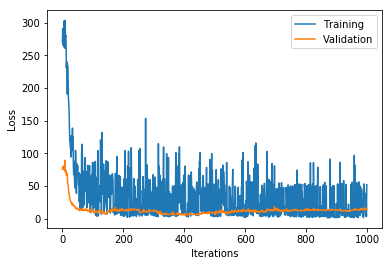

In [20]:
### Implementing Mini-Batch ###

import matplotlib.pyplot as plt


h1 = 15
h2 = 26
h3 = 35



W = [[], np.random.normal(0, 0.1, [N, h1]), 
         np.random.normal(0, 0.1, [h1, h2]),
         np.random.normal(0, 0.1, [h2, h3]),
         np.random.normal(0, 0.1, [h3, 1])]

b = [[], np.random.normal(0, 0.1, [h1, 1]), 
         np.random.normal(0, 0.1, [h2, 1]),
         np.random.normal(0, 0.1, [h3, 1]),
         np.random.normal(0, 0.1, [1, 1])]

L = len(W)-1


"""
Sigmoid Activation Function
"""

def act(z):
    c = np.exp(-z)
    c[c < 1e-6] = 1e-6
    return 1/(1 + c)

def actder(z):
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod


"""
ReLU Activation Function
"""

def ReLU(z):
    z[z < 0] = 0
    return z

def ReLU_der(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z


"""
Feed-Forward
"""

def ff(x, W, b):
    L = len(W)-1
    a = x
    for l in range(1, L+1):
        z = W[l].T * a + b[l]
        a = act(z)
    return a


"""
Loss Function
"""

def loss(y,yhat):
    return -(np.multiply((1 - y), np.log(1 - yhat)) + np.multiply(y, np.log(yhat)))



M = Xtrain.shape[0]
N = Xtrain.shape[1]
S = Xtest.shape[0]
R = Xtest.shape[1]


alpha = 0.01
iterations = 1000
mini_batch = 10

training_loss = []
validation_loss = []

for iter in range(0, iterations):
    train_loss = 0
    validate_loss = 0
    order = np.random.permutation(M) 
    for i in range(0, int(M / mini_batch)):
    
        x_this = Xtrain[order[i : i + mini_batch], :].T
        y_this = Ytrain[order[i : i + mini_batch], :]
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1, L+1):
            z.append(W[l].T * a[l - 1] + b[l])
            a.append(act(z[l]))
            
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        train_loss_pattern = np.sum(loss(y_this, a[L].T))
        train_loss = train_loss + train_loss_pattern
            
        # Backpropagation

        delta[L] = np.sum(a[L].T - y_this, axis = 0)
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = np.sum(a[l-1], axis = 1) * delta[l].T
            if l > 1:
                #delta[l-1] = np.multiply(W[l], actder(z[l-1])) * delta[l]
                delta[l-1] = np.sum(np.multiply(actder(z[l-1]), W[l] * delta[l]), axis = 1)
        
        # Weights and Biases
        for l in range(1, L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    
    
    for i in range(0, S):
        x_this = Xtest[i,:].T
        y_this = Ytest[i, 0]
        a = [x_this]
        z = [[]]
        
        for l in range(1, L+1):
            z.append(W[l].T * a[l - 1] + b[l])
            a.append(act(z[l]))
            
            
        validate_pattern = loss(y_this, a[L][0, 0])
        validate_loss = validate_loss + validate_pattern
        
    
        
    training_loss.append(train_loss)
    validation_loss.append(validate_loss)
    #print('Iteration %d Training loss %f' % (iter, train_loss))
    #print("Iteration %d Validation loss %f" %(iter, validate_loss))
    

print("Training Loss %f " % training_loss[-1])
print("Validation Loss %f " % validation_loss[-1])

#Plot training loss and validation loss

plt.plot(range(iterations), training_loss, label = "Training")
plt.plot(range(iterations), validation_loss, label = "Validation")

plt.legend()

plt.xlabel("Iterations")
plt.ylabel("Loss")
    
plt.show()

*Results table and discussion goes here.*

+ Mini-Batch performs the iterations and converges faster than the normal model.
+ We can see some Overfitting in some models with different batch sizes, but they converge to a better loss value at the end.

<table style="width:50%">
  <tr>
    <th>Mini Batch Size</th>
      <th>No. of Layers</th>
    <th>Training Loss</th> 
    <th>Validation Loss</th>
    <th>Learning Rate</th>
    <th>Iterations</th>
  </tr>
  <tr>
    <td>10</td>
      <td>3-layers</td>
    <td>44.924872</td> 
    <td>6.253631</td>
    <td>0.001</td>
      <td>1000</td> 
  </tr>
  <tr>
    <td>10</td>
      <td>3-layers</td>
    <td>46.980616</td> 
    <td>8.391820</td>
    <td>0.01</td>
      <td>500</td> 
  </tr>
  <tr>
    <td>20</td>
      <td>3-layers</td>
    <td>169.547813</td> 
    <td>37.718345</td>
    <td>0.01</td>
      <td>500</td> 
  </tr>
  <tr>
    <td>20</td>
      <td>4-layers</td>
    <td>79.399493</td> 
    <td>7.687325</td>
    <td>0.001</td>
      <td>1000</td> 
  </tr> 
  <tr>
    <td>40</td>
    <td>4-layers</td>
    <td>305.759192 </td> 
    <td>77.400434 </td>
    <td>0.01</td>
    <td>299</td> 
  </tr>

## Question 5

Modify the model to use the ReLU activation function in the hidden layers rather than logistic sigmoid. Repeat your experiments and report the results. Do you observe any differences in terms of accuracy and number of iterations to converge?

Training Loss 31.674948 
Validation Loss 8.032390 


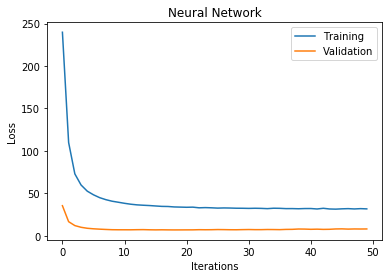

In [17]:
### Implementing Neural Network using ReLU Activation Function ###


import matplotlib.pyplot as plt




h1 = 10

W = [[], np.random.normal(0, 0.1, [N, h1]),
         np.random.normal(0, 0.1, [h1, 1])]
#          np.random.normal(0, 0.1, [h2, h3]),
#          np.random.normal(0, 0.1, [h3, h4]),
#         np.random.normal(0, 0.1, [h4, 1])]

b = [[], np.random.normal(0, 0.1, [h1, 1]),
#          np.random.normal(0, 0.1, [h2, 1]),
#          np.random.normal(0, 0.1, [h3, 1]),
#          np.random.normal(0, 0.1, [h4, 1]),
        np.random.normal(0, 0.1, [1, 1])]

L = len(W) - 1

"""
Sigmoid Activation Function
"""

def act(z):
    c = np.exp(-z)
    c[c < 1e-6] = 1e-6
    return 1/(1 + c)

def actder(z):
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod


"""
ReLU Activation Function
"""

def ReLU(z):
    z[z < 0] = 0
    return z

def ReLU_der(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z


"""
Feed-Forward
"""

def ff(x, W, b):
    L = len(W)-1
    a = x
    for l in range(1, L+1):
        z = W[l].T * a + b[l]
        a = act(z)
    return a


"""
Loss Function
"""

def loss(y,yhat):
    return -(np.multiply((1 - y), np.log(1 - yhat)) + np.multiply(y, np.log(yhat)))



M = Xtrain.shape[0]
N = Xtrain.shape[1]
S = Xtest.shape[0]
R = Xtest.shape[1]


alpha = 0.01
iterations = 50
mini_batch = 1

training_loss = []
validation_loss = []

for iter in range(0, iterations):
    train_loss = 0
    validate_loss = 0
    order = np.random.permutation(M) 
    for i in range(0, M):
    
        x_this = Xtrain[order[i],:].T
        y_this = Ytrain[order[i],0]
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1, L+1):
            z.append(W[l].T * a[l - 1] + b[l])
            if l < L:
                a.append(ReLU(z[l]))
            else:
                a.append(act(z[l]))
                
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        train_loss_pattern = loss(y_this, a[L][0,0])
        train_loss = train_loss + train_loss_pattern
            
        # Backprop step... (to fill in!)

        delta[L] = a[L] - y_this
        for l in range(L, 0, -1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                #delta[l-1] = np.multiply(W[l], actder(z[l-1])) * delta[l]
                if l == L:
                    delta[l - 1] = np.multiply(actder(z[l - 1]), W[l] * delta[l]) 
                else:        
                    delta[l - 1] = np.multiply(ReLU_der(z[l - 1]), W[l] * delta[l])
                
        
        
        # MOMENTUM
        for l in range(1, L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    
    
    for i in range(0, S):
        x_this = Xtest[i,:].T
        y_this = Ytest[i, 0]
        a = [x_this]
        z = [[]]
        
        for l in range(1, L+1):
            z.append(W[l].T*a[l-1] + b[l])
            if l < L:
                a.append(ReLU(z[l]))
            else:
                a.append(act(z[l]))
            
        validate_pattern = loss(y_this, a[L][0, 0])
        validate_loss = validate_loss + validate_pattern
        
    
        
    training_loss.append(train_loss)
    validation_loss.append(validate_loss)
    #print('Iteration %d Training loss %f' % (iter, train_loss))
    #print("Iteration %d Validation loss %f" %(iter, validate_loss))
    

print("Training Loss %f " % training_loss[-1])
print("Validation Loss %f " % validation_loss[-1])

#Plot training loss and validation loss

plt.plot(range(iterations), training_loss, label = "Training")
plt.plot(range(iterations), validation_loss, label = "Validation")

plt.legend()

plt.title("Neural Network")    
plt.xlabel("Iterations")
plt.ylabel("Loss")
    
plt.show()

*Results table and discussion goes here.*

+ The model works good for a 2-layer network when we use ReLU Activation Function.
+ When we increase the number of layers and hidden units, we observe Overfitting of the model.
+ The accuracy of the model is similar to that of the model using Sigmoid Activation Function, but for a more complex network the Sigmoid Activation works better than ReLU.

<table style="width:50%">
  <tr>
    <th>No. of Layers</th>
      <th>Hidden Units</th>
    <th>Training Loss</th> 
    <th>Validation Loss</th>
    <th>Learning Rate</th>
    <th>Iterations</th>
  </tr>
  <tr>
    <td>2-layers</td>
      <td>5</td>
    <td>42.542116</td> 
    <td>9.343972 </td>
    <td>0.01</td>
      <td>60</td> 
  </tr>
  <tr>
    <td>4-layers</td>
      <td>5, 6, 10</td>
    <td>0.066009 </td> 
    <td>30.894134 </td>
    <td>0.01</td>
      <td>500</td> 
  </tr>
  <tr>
    <td>4-layers</td>
      <td>5, 6, 10</td>
    <td>13.730880 </td> 
    <td>14.017178 </td>
    <td>0.01</td>
      <td>50</td> 
  </tr>
  <tr>
    <td>5-layers</td>
      <td>15, 26, 30, 43</td>
    <td>2.775645</td> 
    <td>14.249771</td>
    <td>0.01</td>
      <td>50</td> 
  </tr> 
  